### Projeto 01, Estudando dataset retirado da Kagle sobre automóveis
Link -> https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset

##### Dicionário de Dados

* Name: Identificador único para cada automóvel.
* MPG: Eficiência de combustível medida em milhas por galão.
* Cylinders: Número de cilindros no motor.
* Displacement: Cilindrada do motor, indicando seu tamanho ou capacidade.
* Horsepower: Potência de saída do motor.
* Weight: Peso do automóvel.
* Acceleration: Capacidade de aumentar a velocidade, medida em segundos.
* Model Year: Ano de fabricação do modelo do automóvel.
* Origin: País ou região de origem de cada automóvel.

In [70]:
# importando as Bibliotecas

#Manipulação de dados
import pandas as pd
import numpy as np

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

#Estatistica
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

#Engenharia de atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [71]:
#Importando Dataset
df = pd.read_csv('Datasets/Automobile.csv')

In [72]:
df.shape

(398, 9)

In [73]:
# Visualização inicial dos dados
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### Análise Exploratória dos dados

In [75]:
df.describe().round()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.0,398.0,398.0,392.0,398.0,398.0,398.0
mean,24.0,5.0,193.0,104.0,2970.0,16.0,76.0
std,8.0,2.0,104.0,38.0,847.0,3.0,4.0
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0
25%,18.0,4.0,104.0,75.0,2224.0,14.0,73.0
50%,23.0,4.0,148.0,94.0,2804.0,16.0,76.0
75%,29.0,8.0,262.0,126.0,3608.0,17.0,79.0
max,47.0,8.0,455.0,230.0,5140.0,25.0,82.0


* Podemos observar que o dataset apresenta modelos de carros até o ano de 1982

##### Verificando a distribuição das variáveis

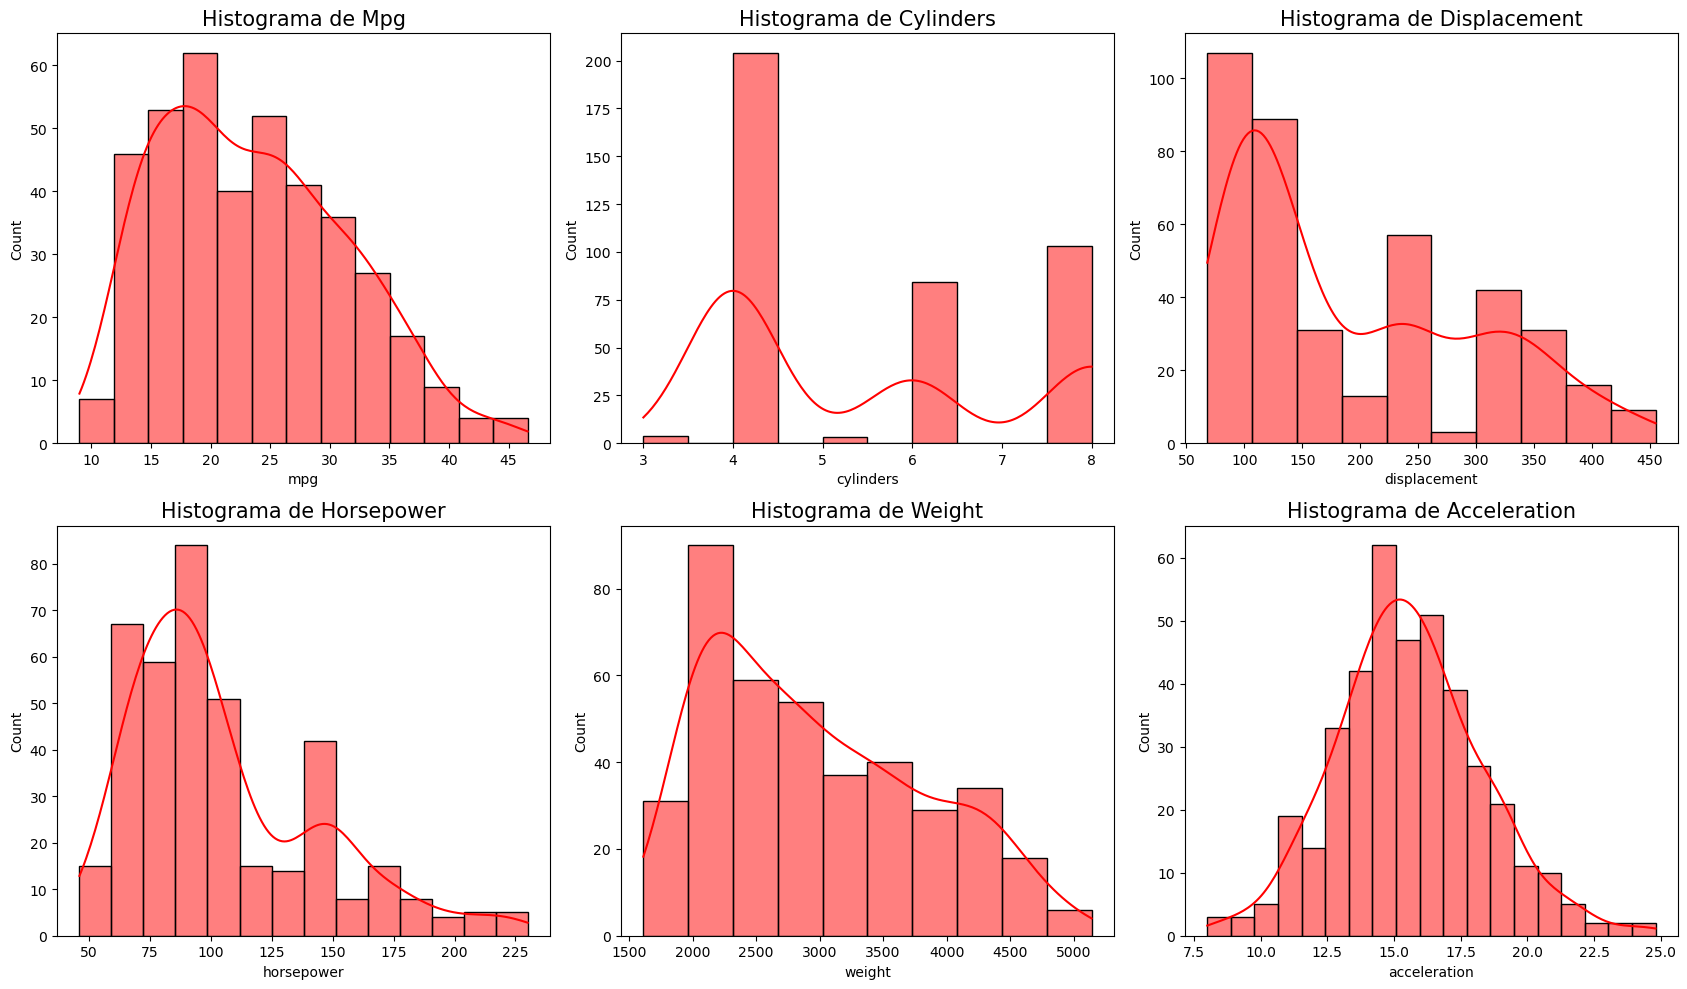

In [26]:
# Histogramas
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Lista de colunas
colunas = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Loop para criar os histogramas
for i, coluna in enumerate(colunas):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[coluna], kde=True, color="red")
    plt.title(f'Histograma de {coluna.capitalize()}', fontsize=15)

plt.tight_layout()
plt.show()

* Podemos observar pelos gráficos que os dados não seguem distribuição normal

In [27]:
#Teste de Normalidade da Distribuição

#Lista com as variaveis numéricas
numerical_feature = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

#Loop

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ": Distribuição Normal=", pval)
    else:
        print(i, ": Distribuição Não Normal=", pval)

mpg : Distribuição Não Normal= 3.439111026186637e-05
cylinders : Distribuição Não Normal= 0.0
displacement : Distribuição Não Normal= 2.7079778453804458e-12
horsepower : Distribuição Não Normal= nan
weight : Distribuição Não Normal= 9.829082726891064e-11
acceleration : Distribuição Não Normal= 0.022060293509481233


* As variáveis estudadas não seguem distribuição normal, então, usaremos métodos não paramétricos 

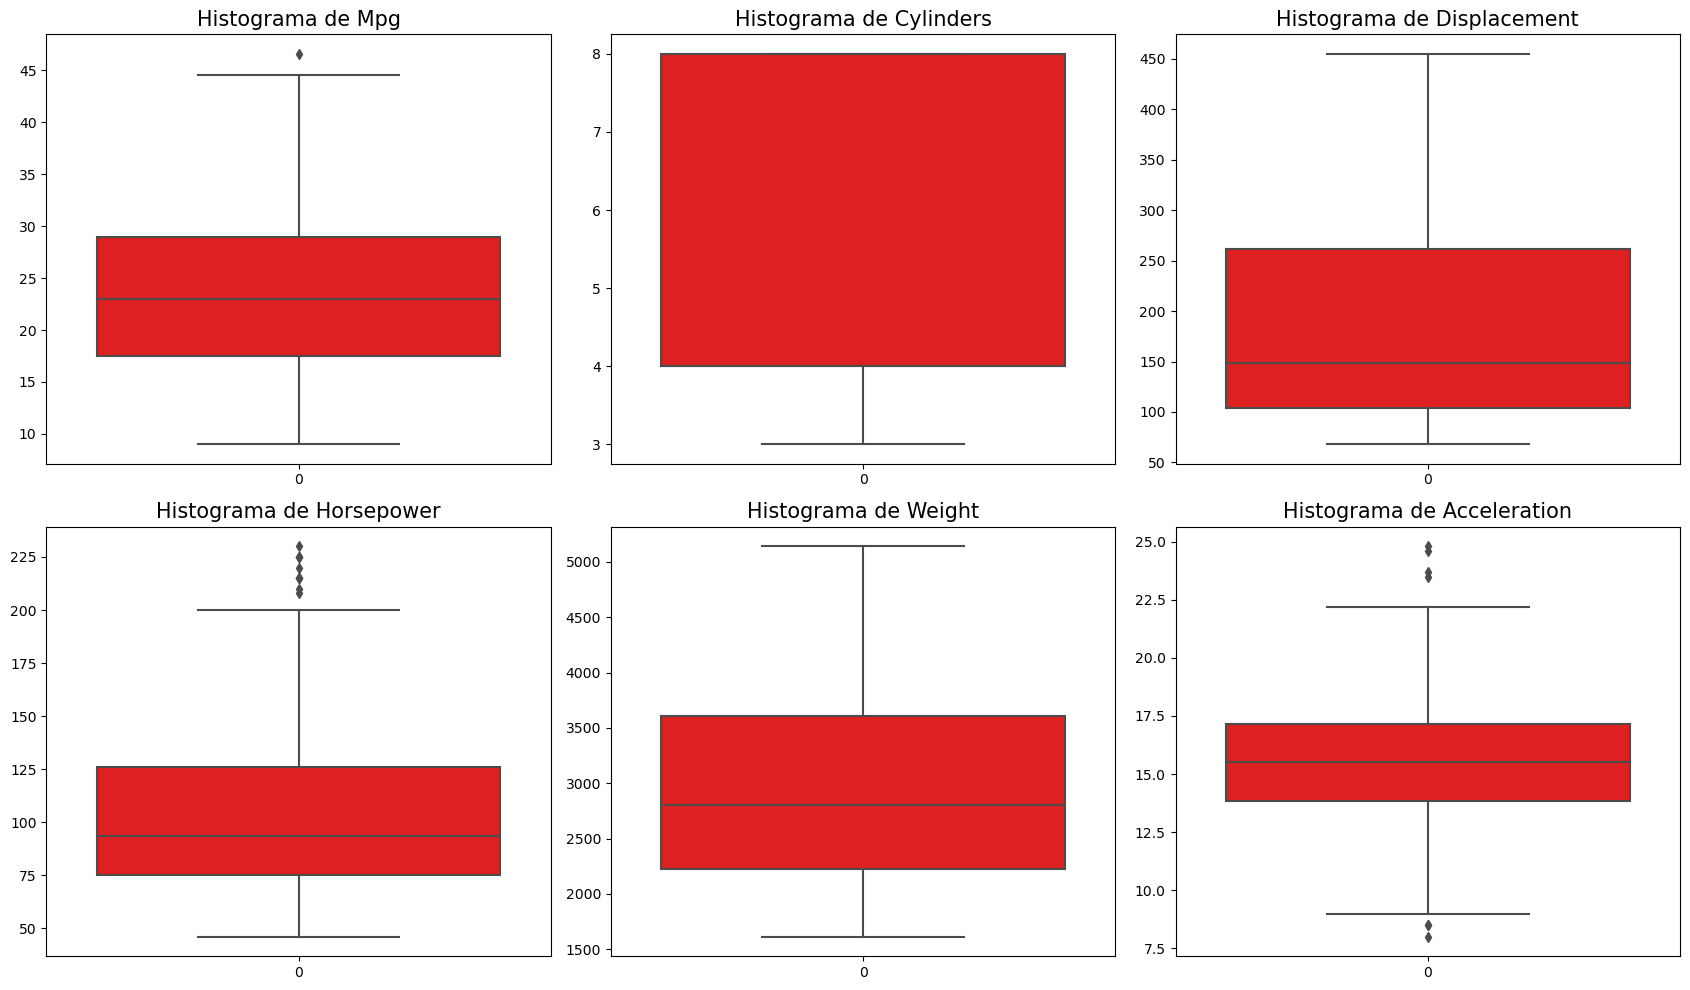

In [29]:
# Boxplots
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Lista de colunas
colunas = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Loop
for i, coluna in enumerate(colunas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[coluna],color="red")
    plt.title(f'Histograma de {coluna.capitalize()}', fontsize=15)

plt.tight_layout()
plt.show()

* Podemos observar que a maioria das variáveis não apresenta outliers relevantes, com exceção de Acceleration (capacidade de aumentar a velocidade do automóvel) e Horsepower (potência de saída do motor). Essas duas variáveis mostram dados bastante distantes devido à presença de diferentes modelos de carros de diferentes anos no dataset. Essa dispersão é esperada, uma vez que diferentes modelos de carros têm características distintas em termos de desempenho e potência.

### Correlação de Dados

Correlação de Spearman

In [30]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [60]:
# Criar Copia do Dataframe
df_numerical = df.copy()

In [39]:
df_numerical.drop("model_year", axis = 1).corr("spearman")

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

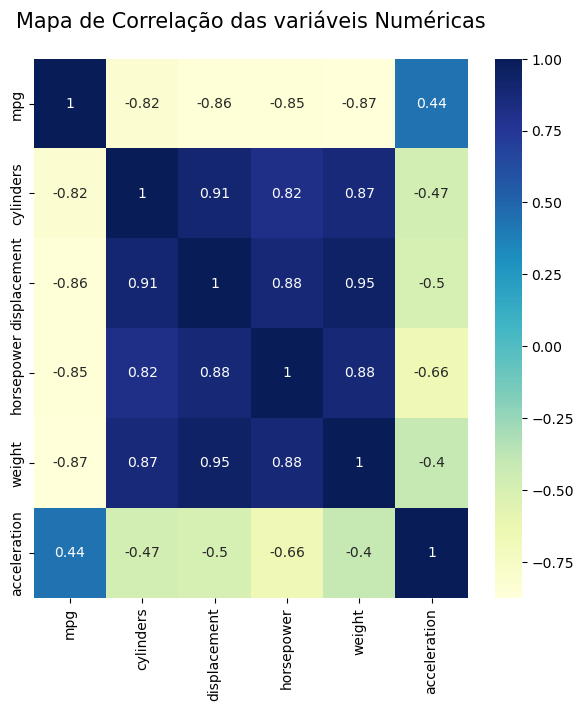

In [40]:
# Heatmap

plt.figure(figsize=(7,7))
sns.heatmap(df_numerical.drop("model_year", axis=1).corr("spearman"), annot = True, cmap="YlGnBu")
plt.title("Mapa de Correlação das variáveis Numéricas\n", fontsize=15)
plt.show

##### Dicionário de Dados

* Name: Identificador único para cada automóvel.
* MPG: Eficiência de combustível medida em milhas por galão.
* Cylinders: Número de cilindros no motor.
* Displacement: Cilindrada do motor, indicando seu tamanho ou capacidade.
* Horsepower: Potência de saída do motor.
* Weight: Peso do automóvel.
* Acceleration: Capacidade de aumentar a velocidade, medida em segundos.
* Model Year: Ano de fabricação do modelo do automóvel.
* Origin: País ou região de origem de cada automóvel.

#### Podemos notar correlações positivas e negativas fortes entre as variáveis:
##### Correlações positivas Relevantes:

* Cylinders e Displacement (0.91): Existe uma forte correlação positiva, mas esperada. Isso indica que, em geral, quanto maior for a quantidade de cilindros em um automóvel, maior será a capacidade do motor em termos de cilindrada.

* Cylinders e Horsepower (0.82): Há uma correlação positiva forte entre o número de cilindros e a potência de saída do motor. Isso sugere que automóveis com um maior número de cilindros tendem a ter uma potência mais elevada.

* Cylinders e Weight (0.87): Existe uma correlação positiva forte entre o número de cilindros e o peso do automóvel. Isso indica que veículos mais pesados têm maior probabilidade de possuir um maior número de cilindros.

* Displacement e Horsepower (0.88): Há uma correlação positiva forte entre a cilindrada do motor e a potência de saída. Isso significa que motores com maior cilindrada geralmente têm uma potência mais elevada.

* Displacement e Weight (0.95): Existe uma correlação positiva forte entre a cilindrada do motor e o peso do automóvel. Isso indica que veículos com motores de maior cilindrada tendem a ser mais pesados.

* Horsepower e Weight (0.88): Há uma correlação positiva forte entre a potência de saída do motor e o peso do automóvel. Isso sugere que veículos mais pesados tendem a ter uma potência de saída maior.

##### Correlações negativas relevantes:

* MPG e Weight (-0.87): Há uma correlação negativa forte entre a eficiência de combustível (medida em milhas por galão) e o peso do automóvel. Isso sugere que veículos mais leves têm maior probabilidade de ter uma melhor eficiência de combustível.

* MPG e Horsepower (-0.85): Existe uma correlação negativa forte entre a eficiência de combustível e a potência de saída do motor. Isso indica que veículos com uma potência mais elevada tendem a ter uma eficiência de combustível inferior.

* MPG e Displacement (-0.86): Há uma correlação negativa forte entre a eficiência de combustível e a cilindrada do motor. Isso sugere que motores com maior cilindrada tendem a ter uma eficiência de combustível inferior.

* MPG e Cylinders (-0.82): Existe uma correlação negativa forte entre a eficiência de combustível e o número de cilindros. Isso indica que veículos com um maior número de cilindros tendem a ter uma eficiência de combustível inferior.

In [54]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


#### Identificando valores Ausentes

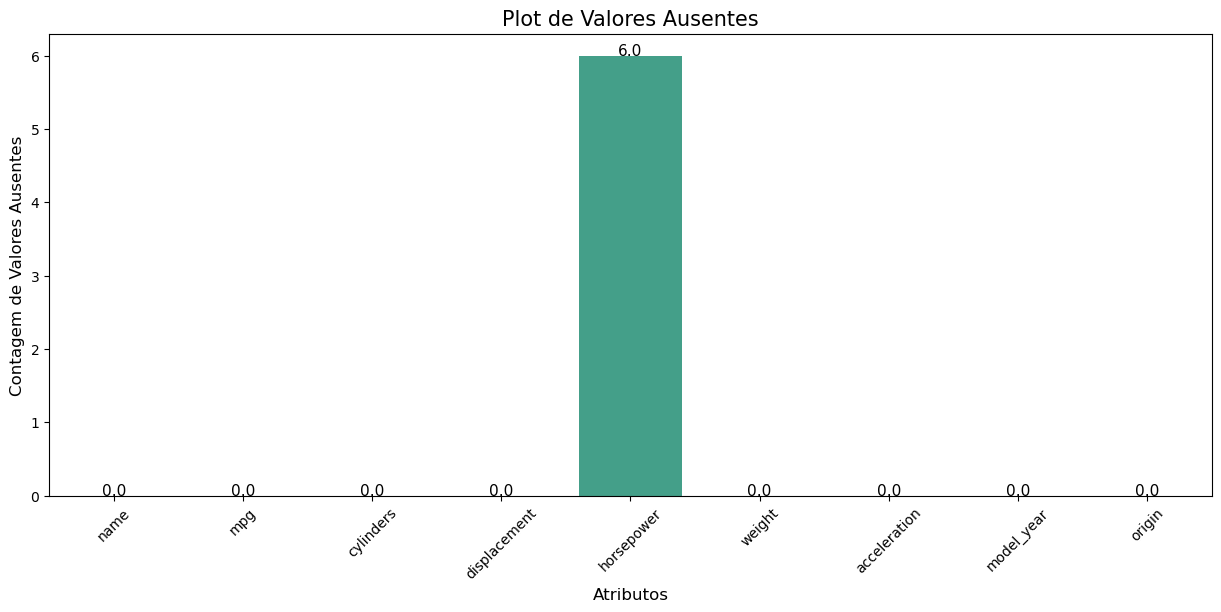

In [43]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x=null_df['index'], y=null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

* Podemos observar que há poucos dados ausentes no conjunto de dados, o que indica que não é necessário realizar um tratamento específico para lidar com valores ausentes. A quantidade reduzida de dados faltantes é positiva, pois nos permite utilizar o conjunto de dados completo em nossas análises sem a necessidade de preenchimento ou exclusão de registros

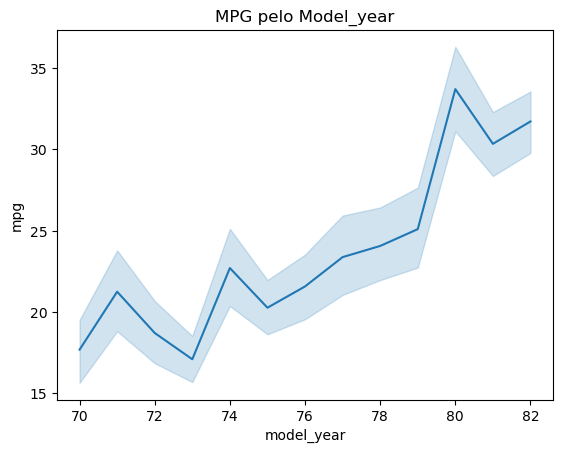

In [59]:
# Criando um gráfico de linha
sns.lineplot(data=df, x='model_year', y='mpg', markers=True)
plt.title("MPG pelo Model_year")
# Exibindo o gráfico
plt.show()

* Podemos observar pelo gráfico que à medida que o ano do modelo (model_year) aumenta, também aumenta o valor de eficiência de combustível (MPG). Isso indica uma tendência de melhoria na eficiência de combustível dos automóveis ao longo do tempo.

In [66]:
# Identificar os veiculos do Dataset com os maires MPG
df_selected = df[['model_year','name','mpg']]

# Ordenar  de forma decrescente
df_sorted = df_selected.sort_values(by='mpg', ascending=False)

df_sorted.head()

,model_year,name,mpg
322,80,mazda glc,46.6
329,80,honda civic 1500 gl,44.6
325,80,vw rabbit c (diesel),44.3
394,82,vw pickup,44.0
326,80,vw dasher (diesel),43.4


* Podemos observar que os modelos mais eficiêntes são os modelos mais novos do dataset, que apresenta modelos até 1982

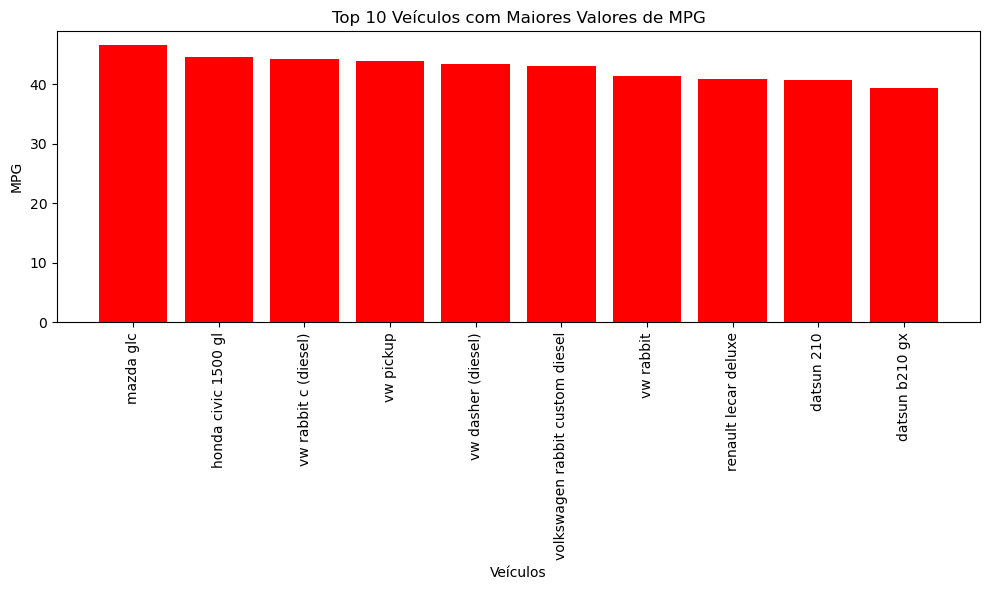

In [68]:
# Identificar os veículos com os maiores valores de MPG
df_selected = df[['model_year', 'name', 'mpg']]
df_sorted = df_selected.sort_values(by='mpg', ascending=False)
top_vehicles = df_sorted.head(10)  # Selecionar os 10 primeiros veículos com maiores valores de MPG

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_vehicles['name'], top_vehicles['mpg'], color='red')
plt.xlabel('Veículos')
plt.ylabel('MPG')
plt.title('Top 10 Veículos com Maiores Valores de MPG')
plt.xticks(rotation=90)
plt.tight_layout()

# Exibir o gráfico
plt.show()

## Relatório Final

Neste estudo, foram analisados dados relacionados a diferentes características de automóveis, como eficiência de combustível, número de cilindros, cilindrada do motor, potência de saída, peso, aceleração, ano de fabricação e origem. Vale ressaltar que o dataset só existem veículos de modelos até 1982. Através dessa análise, foram identificadas correlações relevantes entre as variáveis.

#### Correlações Positivas Relevantes:

* Cylinders e Horsepower (0.82): Há uma correlação positiva forte entre o número de cilindros e a potência de saída do motor. Isso sugere que automóveis com mais cilindros tendem a ter uma potência mais elevada.
* Cylinders e Weight (0.87): Existe uma correlação positiva forte entre o número de cilindros e o peso do automóvel. Isso indica que veículos mais pesados têm maior probabilidade de possuir um maior número de cilindros.
* Displacement e Horsepower (0.88): Há uma correlação positiva forte entre a cilindrada do motor e a potência de saída. Isso significa que motores com maior cilindrada geralmente possuem uma potência mais elevada.
* Displacement e Weight (0.95): Existe uma correlação positiva forte entre a cilindrada do motor e o peso do automóvel. Isso indica que veículos com motores de maior cilindrada tendem a ser mais pesados.
* Horsepower e Weight (0.88): Há uma correlação positiva forte entre a potência de saída do motor e o peso do automóvel. Isso sugere que veículos mais pesados tendem a ter uma potência de saída maior.

#### Correlações Negativas Relevantes:

* MPG e Weight (-0.87): Há uma correlação negativa forte entre a eficiência de combustível e o peso do automóvel. Veículos mais leves têm maior probabilidade de ter uma melhor eficiência de combustível.
* MPG e Horsepower (-0.85): Existe uma correlação negativa forte entre a eficiência de combustível e a potência de saída do motor. Veículos com maior potência tendem a ter uma eficiência de combustível inferior.
* MPG e Displacement (-0.86): Há uma correlação negativa forte entre a eficiência de combustível e a cilindrada do motor. Motores com maior cilindrada tendem a ter uma eficiência de combustível inferior.
* MPG e Cylinders (-0.82): Existe uma correlação negativa forte entre a eficiência de combustível e o número de cilindros. Veículos com maior número de cilindros tendem a ter uma eficiência de combustível inferior.

Além disso, ao analisar o gráfico de linha do MPG em relação ao ano do modelo, podemos observar que à medida que o ano do modelo aumenta, também aumenta o valor de eficiência de combustível. Isso indica uma tendência de melhoria na eficiência de combustível dos automóveis ao longo do tempo.

Por fim, foi observado que os modelos mais eficientes em termos de consumo de combustível são os mais recentes presentes no conjunto de dados, que inclui modelos até o ano de 1982. Isso sugere que houve avanços tecnológicos e regulamentações ao longo dos anos, resultando em veículos mais econômicos.

Essas conclusões destacam a importância das características do motor, como o número de cilindros e a cilindrada, na potência e eficiência de combustível dos automóveis, bem como a influência do peso do veículo. Além disso, ressaltam a evolução da eficiência de combustível ao longo do tempo, refletindo avanços na indústria automotiva.